In [68]:
import pandas as pd

In [69]:
df = pd.read_csv('income.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Data Exploration

In [70]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [71]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [72]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [73]:
# Occupation column encoding as example
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')],  axis=1)
df = df*1
df

,age,workclass,fnlwgt,education,educational-num,marital-status,relationship,race,gender,capital-gain,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,Private,226802,11th,7,Never-married,Own-child,Black,Male,0,...,0,0,1,0,0,0,0,0,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,...,1,0,0,0,0,0,0,0,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Husband,White,Male,0,...,0,0,0,0,0,0,1,0,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Husband,Black,Male,7688,...,0,0,1,0,0,0,0,0,0,0
4,18,?,103497,Some-college,10,Never-married,Own-child,White,Female,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Wife,White,Female,0,...,0,0,0,0,0,0,0,0,1,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,...,0,0,1,0,0,0,0,0,0,0
48839,58,Private,151910,HS-grad,9,Widowed,Unmarried,White,Female,0,...,0,0,0,0,0,0,0,0,0,0
48840,22,Private,201490,HS-grad,9,Never-married,Own-child,White,Male,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# Encoding other columns
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass, dtype=int).add_prefix('workclass_')],  axis=1)
df = df.drop('education', axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status'], dtype=int).add_prefix('marital-status_')],  axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship, dtype=int).add_prefix('relationship_')],  axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race, dtype=int).add_prefix('race_')],  axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country'], dtype=int).add_prefix('native-country_')],  axis=1)
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,Female,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,Male,0,0,20,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0


In [75]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df["income"].apply(lambda x: 1 if x == '>50K' else 0)
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,1,0,0,20,0,0,1,...,0,0,0,0,0,0,0,1,0,0


<Axes: >

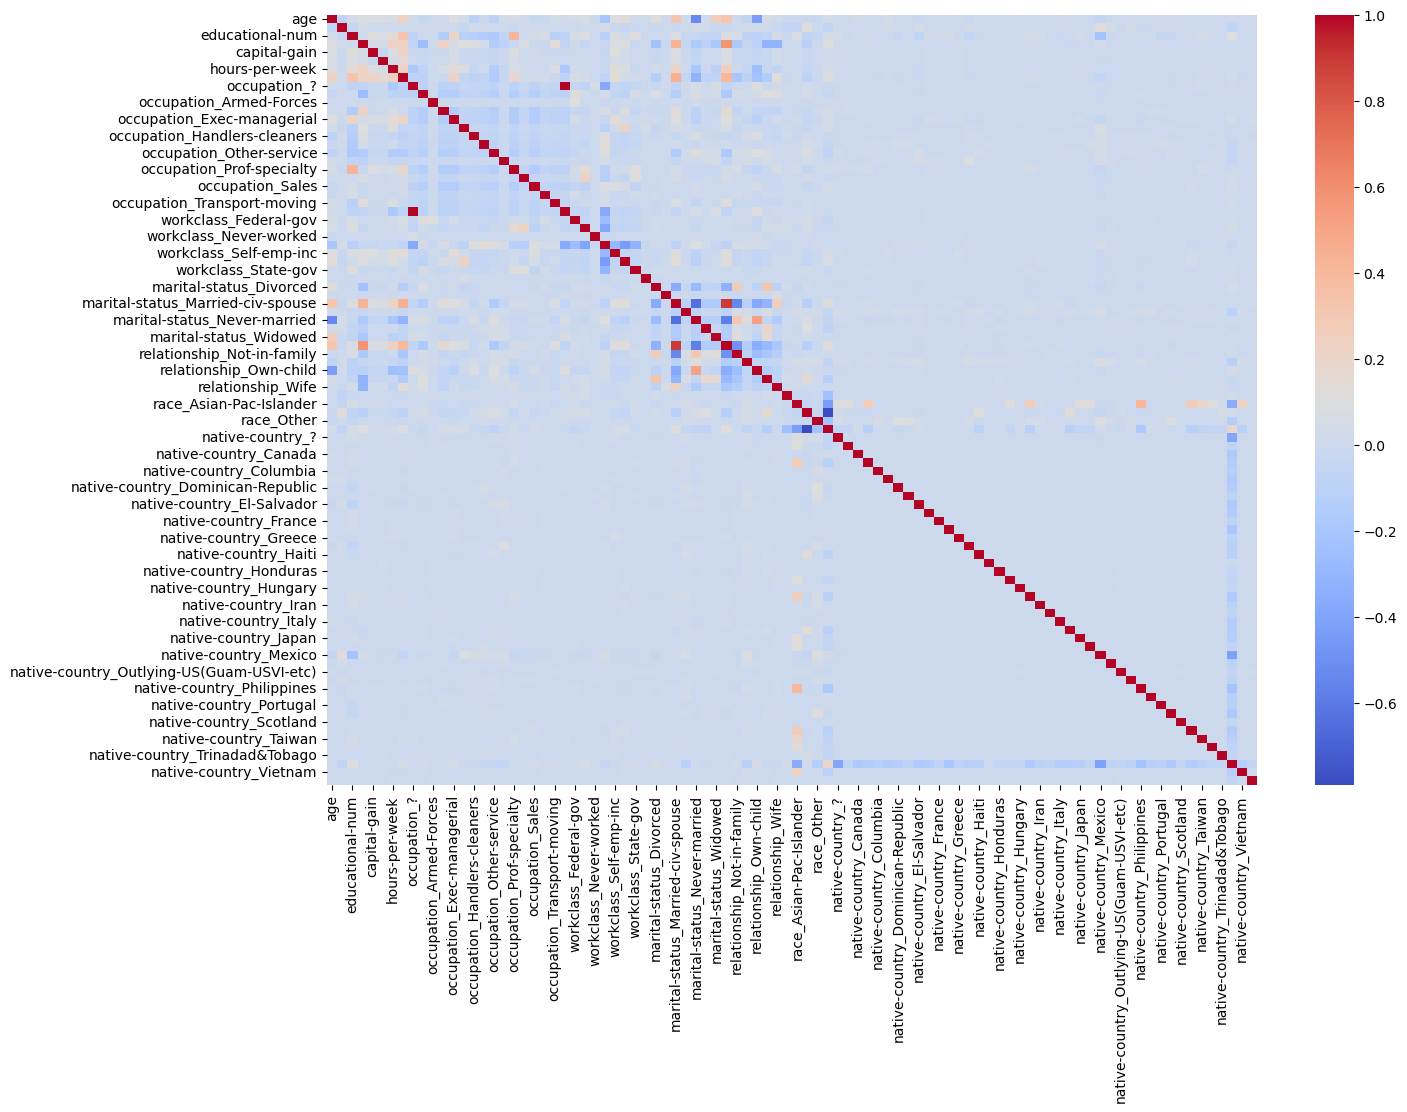

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")

In [78]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
sorted_correlations

native-country_Cuba                  0.000885
native-country_Hong                  0.001591
native-country_Holand-Netherlands    0.002538
native-country_Hungary               0.003538
native-country_Ireland               0.003744
                                       ...   
marital-status_Never-married         0.318782
educational-num                      0.332613
relationship_Husband                 0.403791
marital-status_Married-civ-spouse    0.445853
income                               1.000000
Name: income, Length: 92, dtype: float64

In [79]:
num_cols_to_drop = int(.7 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_drop = df.drop(cols_to_drop, axis=1)
df_drop

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Exec-managerial,...,marital-status_Never-married,marital-status_Separated,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Black,race_White
0,25,7,1,0,0,40,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,38,9,1,0,0,50,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,28,12,1,0,0,40,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,44,10,1,7688,0,40,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,18,10,0,0,0,30,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
48838,40,9,1,0,0,40,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
48839,58,9,0,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
48840,22,9,1,0,0,20,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1


<Axes: >

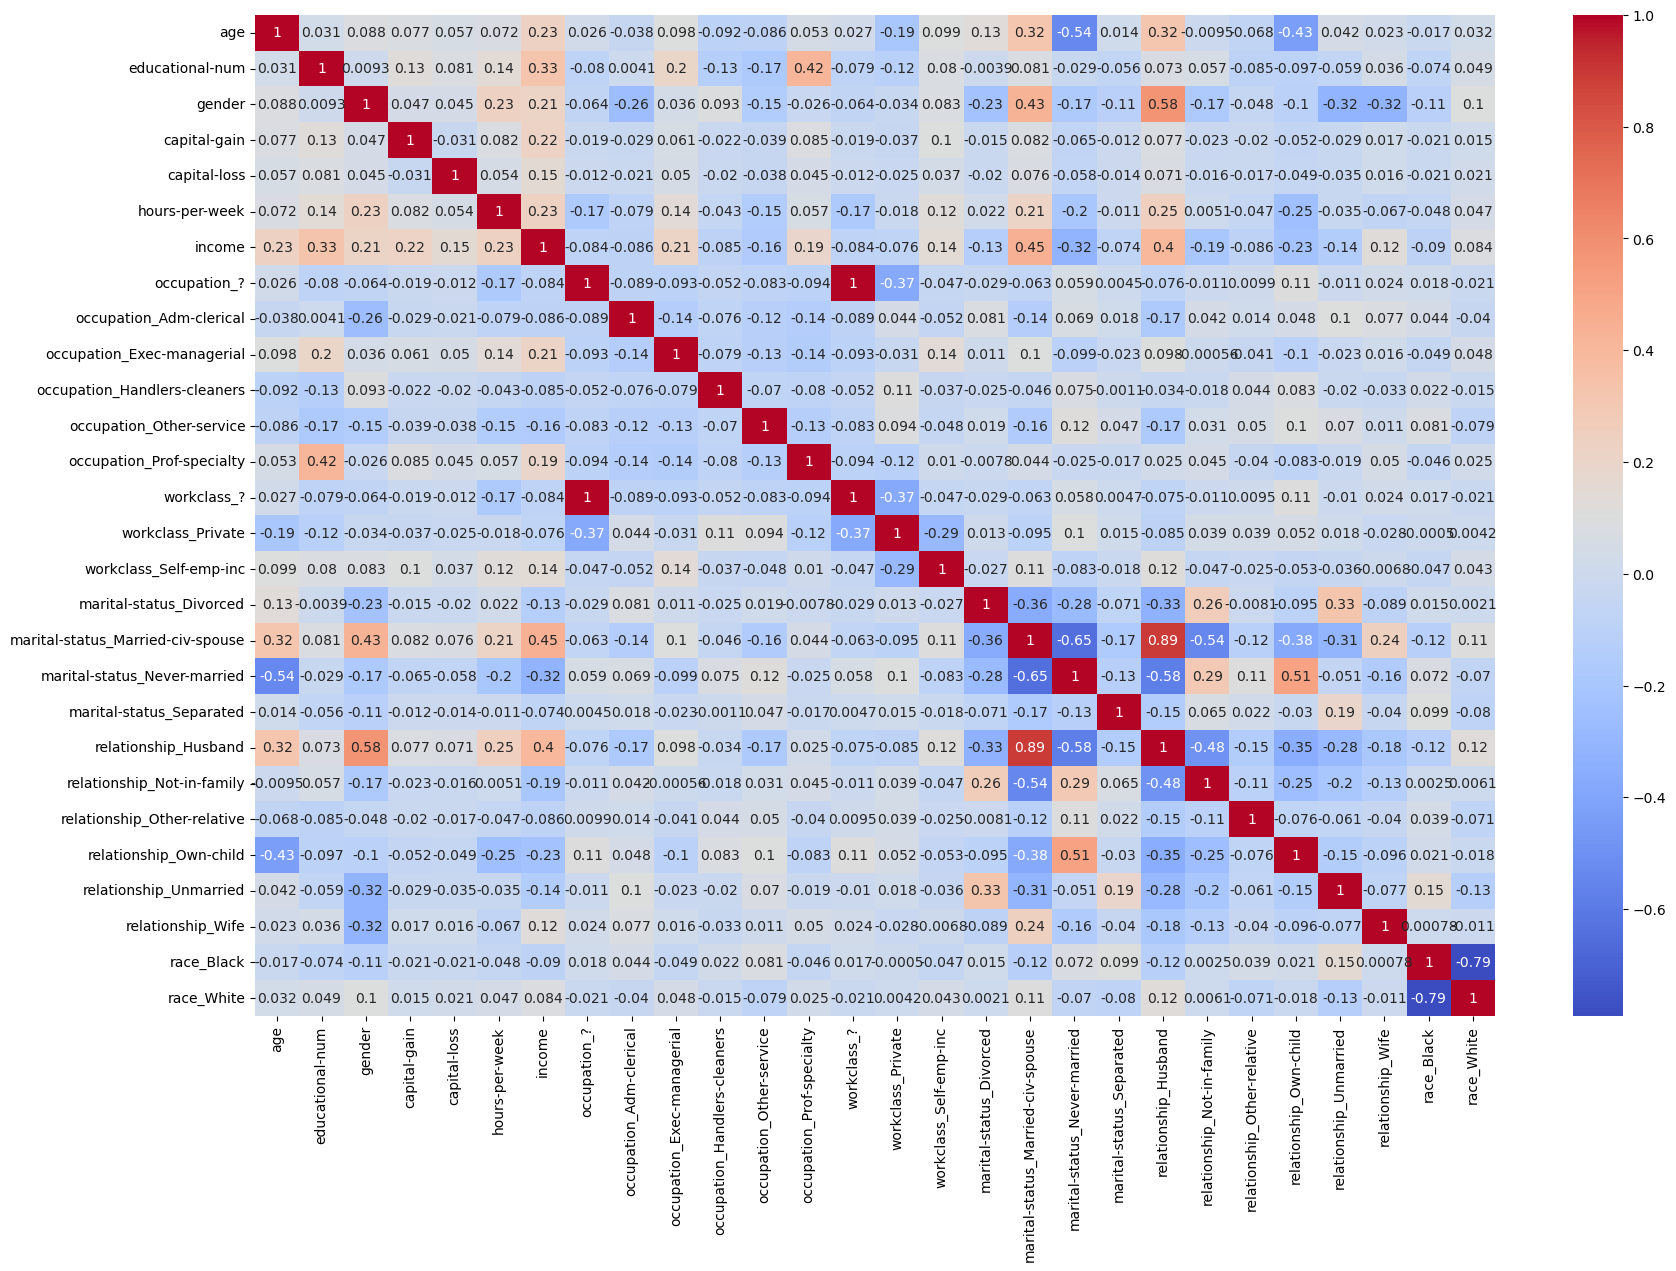

In [83]:
plt.figure(figsize=(20, 13))
sns.heatmap(df_drop.corr(), annot=True, cmap="coolwarm")

## Training model

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [99]:
df = df.drop('fnlwgt', axis=1)

train_df, test_df = train_test_split(df, test_size=0.2)
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
35841,24,10,0,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3921,22,13,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13834,22,10,0,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
27224,26,11,0,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18194,39,2,1,0,0,45,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9800,17,7,0,0,0,16,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28531,51,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23100,32,10,1,0,0,38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7019,18,5,1,0,0,16,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [100]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
24585,40,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20827,40,13,1,0,0,45,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1437,42,14,0,0,1902,40,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
13645,53,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
34472,57,9,0,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6832,25,10,1,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1647,20,10,1,1055,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18412,41,14,0,0,0,60,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11234,27,10,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [101]:
train_X = train_df.drop('income', axis=1)
train_y = train_df.income

test_X = train_df.drop('income', axis=1)
test_y = train_df.income

In [102]:
forest = RandomForestClassifier()

forest.fit(train_X, train_y)

RandomForestClassifier()

In [103]:
forest.score(test_X, test_y)

0.9746116243953625

In [104]:
## Feature Importances
forest.feature_importances_

array([2.27469383e-01, 1.26405997e-01, 1.19171806e-02, 1.12900154e-01,
       3.69380381e-02, 1.14667955e-01, 1.49016275e-03, 4.96450314e-03,
       8.89915252e-05, 6.18680614e-03, 1.89996692e-02, 4.99761301e-03,
       3.50764469e-03, 4.24253703e-03, 8.25087841e-03, 1.97325754e-04,
       1.98076454e-02, 2.75281465e-03, 6.10531197e-03, 4.71098263e-03,
       4.30191076e-03, 2.06039436e-03, 4.83545854e-03, 5.52567014e-03,
       2.01809840e-06, 9.12328782e-03, 6.14579922e-03, 8.18454289e-03,
       4.39659434e-03, 1.45490756e-04, 7.42117474e-03, 3.37931356e-04,
       6.59867110e-02, 1.06276001e-03, 2.80150441e-02, 1.85767284e-03,
       1.72360499e-03, 5.02803944e-02, 1.22230107e-02, 1.62618194e-03,
       6.98939079e-03, 6.16510629e-03, 9.42379371e-03, 1.51260338e-03,
       3.00597065e-03, 5.06402197e-03, 9.95680852e-04, 6.14187894e-03,
       3.02408615e-03, 3.37071501e-04, 1.35186756e-03, 5.99997915e-04,
       3.44443388e-04, 8.66775058e-04, 2.74216018e-04, 1.48826768e-04,
      

In [105]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}
importances

{'age': 0.22746938293037636,
 'educational-num': 0.126405996714024,
 'hours-per-week': 0.11466795457001548,
 'capital-gain': 0.11290015390602993,
 'marital-status_Married-civ-spouse': 0.0659867110267715,
 'relationship_Husband': 0.05028039440571148,
 'capital-loss': 0.0369380381367213,
 'marital-status_Never-married': 0.028015044065922486,
 'occupation_Prof-specialty': 0.019807645392048285,
 'occupation_Exec-managerial': 0.018999669231742674,
 'relationship_Not-in-family': 0.012223010693732068,
 'gender': 0.011917180641940969,
 'relationship_Wife': 0.009423793711378284,
 'workclass_Private': 0.009123287821086866,
 'occupation_Other-service': 0.008250878411822425,
 'workclass_Self-emp-not-inc': 0.008184542893179396,
 'marital-status_Divorced': 0.007421174737366791,
 'relationship_Own-child': 0.006989390789932206,
 'native-country_United-States': 0.0063037573718323575,
 'occupation_Craft-repair': 0.006186806141111304,
 'relationship_Unmarried': 0.0061651062933836855,
 'workclass_Self-emp

## Hyperparemeter Tuning

In [107]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 250],
    "max_depth": [5, 10, 30, None],
    "min_samples_split": [2, 4],
    "max_features": ["sqrt", 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), 
                           param_grid=param_grid, verbose=10)

In [108]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.838 total time=   0.4s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.836 total time=   0.3s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.835 total time=   0.3s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.826 total time=   0.3s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [113]:
forest_2 = grid_search.best_estimator_

In [114]:
forest_2.score(test_X, test_y)

0.9346863563074246

In [115]:
importances = dict(zip(forest_2.feature_names_in_, forest_2.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}
importances

{'age': 0.14732190335027476,
 'capital-gain': 0.13794449406119624,
 'educational-num': 0.13168744911411026,
 'marital-status_Married-civ-spouse': 0.08910111570506273,
 'hours-per-week': 0.08907544523866297,
 'relationship_Husband': 0.06614011062151497,
 'capital-loss': 0.044617290258363064,
 'marital-status_Never-married': 0.031331054558538844,
 'occupation_Exec-managerial': 0.026750047307674843,
 'occupation_Prof-specialty': 0.022415649590440463,
 'relationship_Not-in-family': 0.014134663934053701,
 'gender': 0.014015656900387282,
 'relationship_Own-child': 0.013494038009582975,
 'relationship_Wife': 0.011794285639486483,
 'occupation_Other-service': 0.009640577591351004,
 'workclass_Self-emp-not-inc': 0.008713526289734878,
 'workclass_Private': 0.008566132532728294,
 'marital-status_Divorced': 0.007898324159840401,
 'relationship_Unmarried': 0.007100215556352639,
 'workclass_Self-emp-inc': 0.0066247005577462085,
 'native-country_United-States': 0.006127375667049737,
 'race_White': 0.